In [1]:
import pm4py
%load_ext autoreload
%autoreload 2
import os
print(os.getcwd())
os.chdir('/home/vco/Projects/pm4py-dcr') # working directory should be pm4py-dcr (the one behind notebooks)
print(os.getcwd())

os.environ['PM4PY_SHOW_EVENT_LOG_DEPRECATION'] = 'false'

import numpy as np
np.seterr(divide = 'ignore') 

from pm4py.objects.dcr.exporter import exporter
from pm4py.algo.evaluation.dcr.algorithm import *
from pm4py.algo.discovery.dcr_discover import algorithm
from pm4py.objects.dcr.obj import dcr_template
from pm4py.algo.evaluation.dcr import algorithm as eval_dcr_nesting
# from pm4py.util.benchmarking import benchmark_event_log_from_configs
from pm4py.algo.discovery.dcr_discover.algorithm import Variants

pm4py.util.constants.SHOW_EVENT_LOG_DEPRECATION = False
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 50)

/home/vco/Projects/pm4py-dcr/notebooks_projects
/home/vco/Projects/pm4py-dcr


# Experiment config

In [2]:
config = [{'variant': Variants.DCR_BASIC },{ 'variant': Variants.DCR_ME },{'variant': Variants.DCR_N,},{'variant': Variants.DCR_NME,}]

# Datasets

In [8]:
# all bpi + sepsis + rtfmp + dreyers + pdc
logs_list = {}
logs_folder = '/home/vco/Datasets/data/TKDE_Benchmark'
pdc_folders = {'PDC19':'/home/vco/Datasets/PDC19', 
               'PDC20':'/home/vco/Datasets/PDC20', 
               'PDC21':'/home/vco/Datasets/PDC21', 
               'PDC22':'/home/vco/Datasets/PDC22', 
               'PDC23':'/home/vco/Datasets/PDC23'}
for file in os.listdir(logs_folder):
    if file.endswith(".xes"):
        name = os.path.basename(file.split('.')[0])
        logs_list[name] = os.path.join(logs_folder, file)
logs_list = (logs_list | { 
    'Dreyers':'/home/vco/Datasets/Dreyers Foundation.xes',
    'BPIC19' :'/home/vco/Datasets/BPI_Challenge_2019.xes',
    'BPIC17':'/home/vco/Datasets/BPI Challenge 2017.xes',
    'BPIC17-Offer':'/home/vco/Datasets/BPI Challenge 2017 - Offer log.xes'              
    } )
logs_list_no_pdc = logs_list
logs_list = logs_list | pdc_folders
print(f'[i] Started benchmarking on {len(logs_list)} logs')
print(logs_list)

[i] Started benchmarking on 21 logs
{'RTFMP': '/home/vco/Datasets/data/TKDE_Benchmark/RTFMP.xes', 'BPIC17_f': '/home/vco/Datasets/data/TKDE_Benchmark/BPIC17_f.xes', 'BPIC13_i': '/home/vco/Datasets/data/TKDE_Benchmark/BPIC13_i.xes', 'BPIC15_1f': '/home/vco/Datasets/data/TKDE_Benchmark/BPIC15_1f.xes', 'BPIC15_3f': '/home/vco/Datasets/data/TKDE_Benchmark/BPIC15_3f.xes', 'BPIC15_4f': '/home/vco/Datasets/data/TKDE_Benchmark/BPIC15_4f.xes', 'BPIC14_f': '/home/vco/Datasets/data/TKDE_Benchmark/BPIC14_f.xes', 'BPIC15_5f': '/home/vco/Datasets/data/TKDE_Benchmark/BPIC15_5f.xes', 'BPIC12': '/home/vco/Datasets/data/TKDE_Benchmark/BPIC12.xes', 'BPIC15_2f': '/home/vco/Datasets/data/TKDE_Benchmark/BPIC15_2f.xes', 'SEPSIS': '/home/vco/Datasets/data/TKDE_Benchmark/SEPSIS.xes', 'BPIC13_cp': '/home/vco/Datasets/data/TKDE_Benchmark/BPIC13_cp.xes', 'Dreyers': '/home/vco/Datasets/Dreyers Foundation.xes', 'BPIC19': '/home/vco/Datasets/BPI_Challenge_2019.xes', 'BPIC17': '/home/vco/Datasets/BPI Challenge 2017.x

In [4]:
logs_list.keys()

dict_keys(['RTFMP', 'BPIC17_f', 'BPIC13_i', 'BPIC15_1f', 'BPIC15_3f', 'BPIC15_4f', 'BPIC14_f', 'BPIC15_5f', 'BPIC12', 'BPIC15_2f', 'SEPSIS', 'BPIC13_cp', 'Dreyers', 'BPIC19', 'BPIC17', 'BPIC17-Offer', 'PDC19', 'PDC20', 'PDC21', 'PDC22', 'PDC23'])

In [5]:
# all
results = eval_dcr_nesting.score_everything(logs_list, configs=config)
results

[i] Started for RTFMP
[i] Mining with basic DisCoveR
[i] Mining with ME-DisCoveR
[i] Mining with N-DisCoveR
[i] Mining with NME-DisCoveR
[i] Started for BPIC17_f
[i] Mining with basic DisCoveR
[i] Mining with ME-DisCoveR
[i] Mining with N-DisCoveR
Deleting:  Group2
[i] Mining with NME-DisCoveR
[i] Started for BPIC13_i
[i] Mining with basic DisCoveR
[i] Mining with ME-DisCoveR
[i] Mining with N-DisCoveR
[i] Mining with NME-DisCoveR
[i] Started for BPIC15_1f
[i] Mining with basic DisCoveR
[i] Mining with ME-DisCoveR
[i] Mining with N-DisCoveR
Deleting:  Group20
Deleting:  Group47
Deleting:  Group2
Deleting:  Group26
Deleting:  Group46
Deleting:  Group19
Deleting:  Group27
Deleting:  Group36
Deleting:  Group5
Deleting:  Group8
[i] Mining with NME-DisCoveR
[i] Started for BPIC15_3f
[i] Mining with basic DisCoveR
[i] Mining with ME-DisCoveR
[i] Mining with N-DisCoveR
Deleting:  Group13
Deleting:  Group30
Deleting:  Group38
Deleting:  Group45
Deleting:  Group29
Deleting:  Group26
Deleting:  

,Log name,Algorithm,TP,FP,TN,FN,F1-PDC,F1,BAC,MCC,Training Fitness,Size,Density,Separability,Co-Separability,Constraint Variability,#Relations,#Nestings,#InNActivities,#Activities,Runtime
0,RTFMP,config 0,,,,,,,,,,33,2.000000,0.030303,0.030303,0.769576,22,0,0,11,4.473369
1,RTFMP,config 1,,,,,,,,,,33,2.000000,0.030303,0.030303,0.769576,22,0,0,11,3.853893
2,RTFMP,config 2,,,,,,,,,,30,1.400000,0.266667,0.266667,1.000000,16,3,9,14,6.374265
3,RTFMP,config 3,,,,,,,,,,30,1.400000,0.266667,0.266667,1.000000,16,3,9,14,3.807390
4,BPIC17_f,config 0,,,,,,,,,,82,3.555556,0.012195,0.012195,0.861214,64,0,0,18,5.557044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6243,pdc2023_01001101.xes,config 3,,,,,,,,,,107,1.612903,0.102804,0.102804,1.000000,59,19,41,48,0.467567
6244,pdc2023_10101110.xes,config 0,,,,,,,,,,98,3.173913,0.030612,0.030612,0.591543,73,0,0,25,0.102311
6245,pdc2023_10101110.xes,config 1,,,,,,,,,,98,3.173913,0.030612,0.030612,0.591543,73,0,0,25,0.098422
6246,pdc2023_10101110.xes,config 2,,,,,,,,,,81,1.272727,0.086420,0.086420,0.757636,42,14,30,39,0.134441


In [ ]:
results

In [5]:
only_bpic15 = {k:v for k,v in logs_list.items() if k in ['BPIC15_1f','BPIC15_2f','BPIC15_3f','BPIC15_4f','BPIC15_5f']}
only_bpic15

{'BPIC15_1f': '/home/vco/Datasets/data/TKDE_Benchmark/BPIC15_1f.xes',
 'BPIC15_3f': '/home/vco/Datasets/data/TKDE_Benchmark/BPIC15_3f.xes',
 'BPIC15_4f': '/home/vco/Datasets/data/TKDE_Benchmark/BPIC15_4f.xes',
 'BPIC15_5f': '/home/vco/Datasets/data/TKDE_Benchmark/BPIC15_5f.xes',
 'BPIC15_2f': '/home/vco/Datasets/data/TKDE_Benchmark/BPIC15_2f.xes'}

In [ ]:
# all
results = eval_dcr_nesting.score_everything(only_bpic15, configs=config)

In [7]:
results[['Log name','Algorithm','Size','#Relations','#Nestings']]

,Log name,Algorithm,Size,#Relations,#Nestings
0,BPIC15_1f,config 0,546,476,0
1,BPIC15_1f,config 1,516,434,12
2,BPIC15_1f,config 2,349,239,40
3,BPIC15_1f,config 3,412,304,38
4,BPIC15_3f,config 0,754,692,0
5,BPIC15_3f,config 1,721,650,9
6,BPIC15_3f,config 2,304,206,36
7,BPIC15_3f,config 3,494,385,47
8,BPIC15_4f,config 0,598,533,0
9,BPIC15_4f,config 1,584,514,5


In [9]:
logs_list_no_pdc

{'RTFMP': '/home/vco/Datasets/data/TKDE_Benchmark/RTFMP.xes',
 'BPIC17_f': '/home/vco/Datasets/data/TKDE_Benchmark/BPIC17_f.xes',
 'BPIC13_i': '/home/vco/Datasets/data/TKDE_Benchmark/BPIC13_i.xes',
 'BPIC15_1f': '/home/vco/Datasets/data/TKDE_Benchmark/BPIC15_1f.xes',
 'BPIC15_3f': '/home/vco/Datasets/data/TKDE_Benchmark/BPIC15_3f.xes',
 'BPIC15_4f': '/home/vco/Datasets/data/TKDE_Benchmark/BPIC15_4f.xes',
 'BPIC14_f': '/home/vco/Datasets/data/TKDE_Benchmark/BPIC14_f.xes',
 'BPIC15_5f': '/home/vco/Datasets/data/TKDE_Benchmark/BPIC15_5f.xes',
 'BPIC12': '/home/vco/Datasets/data/TKDE_Benchmark/BPIC12.xes',
 'BPIC15_2f': '/home/vco/Datasets/data/TKDE_Benchmark/BPIC15_2f.xes',
 'SEPSIS': '/home/vco/Datasets/data/TKDE_Benchmark/SEPSIS.xes',
 'BPIC13_cp': '/home/vco/Datasets/data/TKDE_Benchmark/BPIC13_cp.xes',
 'Dreyers': '/home/vco/Datasets/Dreyers Foundation.xes',
 'BPIC19': '/home/vco/Datasets/BPI_Challenge_2019.xes',
 'BPIC17': '/home/vco/Datasets/BPI Challenge 2017.xes',
 'BPIC17-Offer': 

In [10]:
# all
results = eval_dcr_nesting.score_everything(logs_list_no_pdc, configs=config)

[i] Started for RTFMP
[i] Mining with basic DisCoveR
[i] Mining with ME-DisCoveR
[i] Mining with N-DisCoveR
[i] Mining with NME-DisCoveR
[i] Started for BPIC17_f
[i] Mining with basic DisCoveR
[i] Mining with ME-DisCoveR
[i] Mining with N-DisCoveR
Deleting:  Group2
[i] Mining with NME-DisCoveR
[i] Started for BPIC13_i
[i] Mining with basic DisCoveR
[i] Mining with ME-DisCoveR
[i] Mining with N-DisCoveR
[i] Mining with NME-DisCoveR
[i] Started for BPIC15_1f
[i] Mining with basic DisCoveR
[i] Mining with ME-DisCoveR
[i] Mining with N-DisCoveR
Deleting:  Group19
Deleting:  Group44
Deleting:  Group23
Deleting:  Group22
Deleting:  Group5
Deleting:  Group46
Deleting:  Group18
Deleting:  Group34
Deleting:  Group27
Deleting:  Group2
[i] Mining with NME-DisCoveR
[i] Started for BPIC15_3f
[i] Mining with basic DisCoveR
[i] Mining with ME-DisCoveR
[i] Mining with N-DisCoveR
Deleting:  Group41
Deleting:  Group24
Deleting:  Group36
Deleting:  Group23
Deleting:  Group33
Deleting:  Group46
Deleting: 

In [13]:
results.keys()

Index(['Log name', 'Algorithm', 'TP', 'FP', 'TN', 'FN', 'F1-PDC', 'F1', 'BAC',
       'MCC', 'Training Fitness', 'Size', 'Density', 'Separability',
       'Co-Separability', 'Constraint Variability', '#Relations', '#Nestings',
       '#InNActivities', '#Activities', 'Runtime'],
      dtype='object')

In [16]:
results[results['Algorithm']=='config 0'][['Log name','Size','#Relations','#Activities']].reset_index(drop=True)

,Log name,Size,#Relations,#Activities
0,RTFMP,33,22,11
1,BPIC17_f,81,63,18
2,BPIC13_i,10,6,4
3,BPIC15_1f,546,476,70
4,BPIC15_3f,754,692,62
5,BPIC15_4f,598,533,65
6,BPIC14_f,36,27,9
7,BPIC15_5f,644,570,74
8,BPIC12,157,133,24
9,BPIC15_2f,988,906,82


In [ ]:
# i = 1
# res = {}
# for k,v in logs_list.items():
#     try:
#         event_log_file = v
#         dcr_title = k
#         result_file_prefix = k
#         res[k] = benchmark_event_log_from_configs(event_log_file,result_file_prefix,dcr_title,config)
#         print(f'[i] Done for {i}/{len(logs_list)} name: {k}')
#         i += 1
#     except:
#         print(f'[x] Error for log: {event_log_file}')

# Amines metrics
https://www.sciencedirect.com/science/article/pii/S0957417423014264

In [8]:
G = {
    'events': set(['Co','Wr','Ch','Ap','Su','Do','Ex','No']),
    'conditionsFor': {'Wr':{'Co'}},
    'milestonesFor': {'Su':{'Wr'}},
    'responseTo': {'Co':{'Wr'},'Ex':{'No'}},
    'noResponseTo': {'Ap':{'Wr'}},
    'includesTo': {'Wr':{'Ch'}},
    'excludesTo': {'Su':{'Su'}},
    'marking': {'executed': set(['Do']),
                'included': set(['Co','Wr','Ap','Su','Do','Ex','No']),
                'pending': set(['Wr']),
                'executedTime': {},  # Gives the time since a event was executed
                'pendingDeadline': {}  # The deadline until an event must be executed
                },
    'conditionsForDelays': {},
    'responseToDeadlines': {},
    'subprocesses': {},
    'nestings': {},
    'labels': set(),
    'labelMapping': {},
    'roles': set(),
    'roleAssignments': {},
    'readRoleAssignments': {}
}
print(f'[i] Size: {dcr_size(G)}')
print(f'[i] Density: {dcr_density(G)}')
print(f'[i] Separability: {dcr_separability(G)}')
print(f'[i] Constraint Variability: {dcr_constraint_variablity_metric(G)}')
print(run_all_dcr_metrics(G))

[i] Size: 15
[i] Density: 1.2
[i] Separability: 0.2
[i] Constraint Variability: 0.9999999999999999
{'size': 15, 'density': 1.2, 'separability': 0.2, 'constraint_variability': 0.9999999999999999}


In [3]:
G = {
    'events': set(['A','B','C','D','E','F']),
    'conditionsFor': {'A':{'B'},'C':{'B'}},
    'milestonesFor': {},
    'responseTo': {},
    'noResponseTo': {},
    'includesTo': {'A':{'D','E','F'},'B':{'D','E','F'}},
    'excludesTo': {'C':{'D','E','F'}},
    'marking': {'executed': set(),
                'included': set(['A','B','C','D','E','F']),
                'pending': set(),
                'executedTime': {},  # Gives the time since a event was executed
                'pendingDeadline': {}  # The deadline until an event must be executed
                },
    'conditionsForDelays': {},
    'responseToDeadlines': {},
    'subprocesses': {},
    'nestings': {},
    'labels': set(),
    'labelMapping': {},
    'roles': set(),
    'roleAssignments': {},
    'readRoleAssignments': {}
}

# Based on pseudocode

In [4]:
def encode(G):
    enc = {}
    for e in G['events']:
        enc[e] = set()
    for e in G['events']:
        for e_prime in G['events']:
            for rel in Relations:
                if e in G[rel.value] and e_prime in G[rel.value][e]:
                    if rel in [Relations.C,Relations.M]:
                        enc[e].add((e_prime,rel.value,'in'))
                    else:
                        enc[e].add((e_prime,rel.value,'out'))
                if e_prime in G[rel.value] and e in G[rel.value][e_prime]:
                    if rel in [Relations.C,Relations.M]:
                        enc[e].add((e_prime,rel.value,'out'))
                    else:
                        enc[e].add((e_prime,rel.value,'in'))
    return enc

def getOppositeRelDictStr(relStr,direction, event, nestingId):
    relationDictStrDel = (event,relStr,"out" if direction == "in" else "in")
    relationDictStrAdd = (nestingId,relStr,"out"  if direction == "in" else "in")
    
    return relationDictStrDel, relationDictStrAdd


def nest(enc, events_source, nest_id = 0):
    nesting_map = {}
    nesting_ids = set()
    events = deepcopy(events_source)
    while True:
        cands = {}
        for e in events:
            for j in events:
                arrow_s = frozenset(enc[e].intersection(enc[j]))
                if len(arrow_s)>0:
                    cands[arrow_s] = set([e, j])
        
        for arrow_s in cands.keys():
            for e in G['events']:
                if len(arrow_s)>0 and arrow_s.issubset(enc[e]):
                    cands[arrow_s].add(e)
        
        best_score = 0
        best = None
        for arrow_s in cands.keys():
            cand_score = (len(cands[arrow_s])-1)*len(arrow_s)
            if cand_score>best_score:
                best_score = cand_score
                best = arrow_s
                
        if best_score == 0:
            break
        print(f'     [events] {events} \n'
              f'[cands[best]] {cands[best]} \n'
              f'       [best] {best} \n'
              f'        [enc] {enc} \n '
              f'      [cands] {cands} \n')
        nest_id += 1
        nesting_ids.add(f'N{nest_id}')
        enc[f'N{nest_id}'] = set(best)
        for e in cands[best]:
            nesting_map[e] = f'N{nest_id}'
            enc[e] = enc[e].difference(best)
            for (e_prime,rel,direction) in best:
                opRelDel, opRelAdd = getOppositeRelDictStr(rel,direction,e,f'N{nest_id}')
                enc[e_prime].remove(opRelDel)
                enc[e_prime].add(opRelAdd)
        
        # nestings inside nestings
        found = True
        temp_events = deepcopy(cands[best])
        while found:
            enc_prime, nesting_ids_prime, nesting_map_prime = nest(enc, temp_events, nest_id) # replace with find_largest_nesting()
            if len(nesting_ids_prime)>0:
                enc = enc_prime
                nesting_ids = nesting_ids.union(nesting_ids_prime)
                nesting_map = nesting_map | nesting_map_prime
                temp_events = temp_events.difference(cands[best])
            else:
                found = False
            
        events = events.difference(cands[best])
        enc_prime, nesting_ids_prime, nesting_map_prime = nest(enc, events, nest_id) # replace with find_largest_nesting()
        enc = enc_prime
        nesting_ids = nesting_ids.union(nesting_ids_prime)
        # print(f'[nesting_map] {nesting_map}')
        # print(f'[nesting_map_prime] {nesting_map_prime}')
        nesting_map = nesting_map | nesting_map_prime
        # add a second while loop that recursively calls nest()
    return enc, nesting_ids, nesting_map


nest_id = 0
enc = encode(G)
events = G['events']
enc, nesting_ids, nesting_map = nest(enc, events)
print(nesting_ids,nesting_map)

     [events] {'A', 'D', 'E', 'C', 'B', 'F'} 
[cands[best]] {'D', 'F', 'E'} 
       [best] frozenset({('A', 'includesTo', 'in'), ('B', 'includesTo', 'in'), ('C', 'excludesTo', 'in')}) 
        [enc] {'A': {('F', 'includesTo', 'out'), ('E', 'includesTo', 'out'), ('B', 'conditionsFor', 'in'), ('D', 'includesTo', 'out')}, 'D': {('A', 'includesTo', 'in'), ('B', 'includesTo', 'in'), ('C', 'excludesTo', 'in')}, 'E': {('A', 'includesTo', 'in'), ('B', 'includesTo', 'in'), ('C', 'excludesTo', 'in')}, 'C': {('F', 'excludesTo', 'out'), ('D', 'excludesTo', 'out'), ('E', 'excludesTo', 'out'), ('B', 'conditionsFor', 'in')}, 'B': {('C', 'conditionsFor', 'out'), ('D', 'includesTo', 'out'), ('F', 'includesTo', 'out'), ('E', 'includesTo', 'out'), ('A', 'conditionsFor', 'out')}, 'F': {('A', 'includesTo', 'in'), ('B', 'includesTo', 'in'), ('C', 'excludesTo', 'in')}} 
       [cands] {frozenset({('F', 'includesTo', 'out'), ('E', 'includesTo', 'out'), ('B', 'conditionsFor', 'in'), ('D', 'includesTo', 'out')}

# Object oriented code

In [ ]:
nestingRelations: {
      'Release B': 'Nesting0',
      'Release C': 'Nesting1',
      'Release D': 'Nesting1',
      'Release E': 'Nesting1',
      'Nesting1': 'Nesting0',
      'Release A': 'Nesting2',
      'Admission IC': 'Nesting2',
      'ER Registration': 'Nesting3',
      'ER Triage': 'Nesting3',
      'Leucocytes': 'Nesting4',
      'CRP': 'Nesting4',
      'Admission NC': 'Nesting5',
      'Return ER': 'Nesting5'
    }

In [123]:
class Nesting(object):

    def __init__(self):
        self.nesting_ids = set()
        self.nesting_map = {}
        self.nest_id = 0
        self.enc = None
        self.in_rec_step = 0
        self.out_rec_step = 0
        self.debug = False
        
    def create_encoding(self,dcr_graph):
        self.enc = encode(dcr_graph)

    def find_largest_nesting(self, events_source, parent_nesting=None, inrec=False):
        cands = {}
        events = deepcopy(events_source)
        for e in events:
            for j in events:
                arrow_s = frozenset(self.enc[e].intersection(self.enc[j]))
                if len(arrow_s)>0:
                    cands[arrow_s] = set([e, j])
        
        for arrow_s in cands.keys():
            for e in events:
                if len(arrow_s)>0 and arrow_s.issubset(self.enc[e]):
                    cands[arrow_s].add(e)
        
        best_score = 0
        best = None
        for arrow_s in cands.keys():
            cand_score = (len(cands[arrow_s])-1)*len(arrow_s)
            if cand_score>best_score:
                best_score = cand_score
                best = arrow_s
        if best and len(cands[best])>1 and len(best)>= 1:
            if self.debug:
                print(f'[out]:{self.out_rec_step} [in]:{self.in_rec_step} \n'
                      f'     [events] {events} \n'
                      f'[cands[best]] {cands[best]} \n'
                      f'       [best] {best} \n'
                      f'        [enc] {enc} \n '
                      f'      [cands] {cands} \n')
            
            self.nest_id += 1
            self.nesting_ids.add(f'N{self.nest_id}')
            self.enc[f'N{self.nest_id}'] = set(best)
            if parent_nesting:
                parent_nesting['events'] = parent_nesting['events'].difference(cands[best])
                parent_nesting['events'].add(f'N{self.nest_id}')
                self.nesting_map[f'N{self.nest_id}'] = parent_nesting['id']
            
            for e in cands[best]:
                self.nesting_map[e] = f'N{self.nest_id}'
                self.enc[e] = self.enc[e].difference(best)
                for (e_prime,rel,direction) in best:
                    opRelDel, opRelAdd = getOppositeRelDictStr(rel,direction,e,f'N{self.nest_id}')
                    self.enc[e_prime].discard(opRelDel)#.remove(opRelDel)
                    self.enc[e_prime].add(opRelAdd)
            
            self.enc[f'N{self.nest_id}'] = set(best)
            
            retval = [{'nestingEvents': cands[best], 'sharedRels': best}]
            found = True
            while found:
                temp_retval = self.find_largest_nesting(events_source=cands[best], parent_nesting={'id': f'N{self.nest_id}','events': cands[best]}, inrec=True)
                if temp_retval and len(temp_retval)>0:
                    retval.extend(temp_retval)
                    for tmp in temp_retval:
                        events = events.difference(tmp['nestingEvents'])
                else:
                    found = False
                self.in_rec_step += 1
            return retval
    
    def nest(self, events_source):
        nestingsArr = [{'nestingEvents': set(), 'sharedRels': set()}]
        events = deepcopy(events_source)
        while True:
            temp_retval = self.find_largest_nesting(events)
            if temp_retval and len(temp_retval)>0:
                nestingsArr.extend(temp_retval)
                for tmp in temp_retval:
                    events = events.difference(tmp['nestingEvents'])
            else:
                break
            self.out_rec_step += 1
        return self.nesting_map, self.nesting_ids

    def get_nested_dcr_graph(self):
        res_dcr = deepcopy(dcr_template)
        events = set(self.enc.keys())
        res_dcr['events'] = events
        res_dcr['marking']['included'] = events
        
        for n in self.nesting_ids:
            res_dcr['nestings'][n] = set()
        for k,v in self.nesting_map.items():
            res_dcr['nestings'][v].add(k)
        
        def shouldAdd(rel,direction):
            return direction == 'in' if rel in [Relations.C.value,Relations.M.value] else direction == 'out'
        
        for e, v in self.enc.items():
            for e_prime, rel, direction in v:
                if shouldAdd(rel,direction):
                    if e not in res_dcr[rel]:
                        res_dcr[rel][e] = set()
                    res_dcr[rel][e].add(e_prime)
        return res_dcr

In [103]:
n = Nesting()  
n.create_encoding(G)
n.nest(G['events'])

({'D': 'N1', 'F': 'N1', 'E': 'N1', 'B': 'N2', 'A': 'N2'}, {'N1', 'N2'})

In [104]:
n.get_nested_dcr_graph()

{'events': {'A', 'B', 'C', 'D', 'E', 'F', 'N1', 'N2'},
 'conditionsFor': {'A': {'B'}, 'C': {'B'}},
 'milestonesFor': {},
 'responseTo': {},
 'noResponseTo': {},
 'includesTo': {'N2': {'N1'}},
 'excludesTo': {'C': {'N1'}},
 'marking': {'executed': set(),
  'included': {'A', 'B', 'C', 'D', 'E', 'F', 'N1', 'N2'},
  'pending': set(),
  'executedTime': {},
  'pendingDeadline': {}},
 'conditionsForDelays': {},
 'responseToDeadlines': {},
 'subprocesses': {},
 'nestings': {'N1': {'D', 'E', 'F'}, 'N2': {'A', 'B'}},
 'labels': set(),
 'labelMapping': {},
 'roles': set(),
 'roleAssignments': {},
 'readRoleAssignments': {}}

In [76]:
n.nesting_map

{'D': 'N1', 'F': 'N1', 'E': 'N1', 'B': 'N2', 'A': 'N2'}

In [62]:
G_copy = deepcopy(G)

In [2]:
sepsis_log = pm4py.read_xes('/home/vco/Datasets/Sepsis Cases - Event Log.xes',return_legacy_log_object=True)
sepsis_reference_dcr, _ = algorithm.apply(sepsis_log)

parsing log, completed traces ::   0%|          | 0/1050 [00:00<?, ?it/s]

[i] Mining with basic DisCoveR


In [124]:
n = Nesting()
n.create_encoding(sepsis_reference_dcr)
n.nest(sepsis_reference_dcr['events'])
nested_sepsis = n.get_nested_dcr_graph()

In [125]:
nested_sepsis

{'events': {'Admission IC',
  'Admission NC',
  'CRP',
  'ER Registration',
  'ER Sepsis Triage',
  'ER Triage',
  'IV Antibiotics',
  'IV Liquid',
  'LacticAcid',
  'Leucocytes',
  'N1',
  'N2',
  'N3',
  'N4',
  'N5',
  'N6',
  'Release A',
  'Release B',
  'Release C',
  'Release D',
  'Release E',
  'Return ER'},
 'conditionsFor': {'Return ER': {'N2', 'N3'},
  'IV Antibiotics': {'ER Sepsis Triage'},
  'Admission NC': {'ER Registration', 'ER Triage'},
  'Release B': {'ER Registration', 'ER Triage'},
  'N1': {'ER Sepsis Triage', 'N5'},
  'N2': {'Admission NC'},
  'N3': {'ER Registration', 'ER Triage'}},
 'milestonesFor': {},
 'responseTo': {},
 'noResponseTo': {},
 'includesTo': {},
 'excludesTo': {'Return ER': {'Admission IC', 'ER Triage', 'N6', 'Release B'},
  'IV Antibiotics': {'IV Antibiotics'},
  'Release A': {'Admission NC', 'N1', 'N3'},
  'Release B': {'N1', 'Return ER'},
  'ER Registration': {'ER Registration'},
  'IV Liquid': {'IV Liquid'},
  'ER Sepsis Triage': {'ER Sepsis 

In [127]:
exporter.apply(nested_sepsis,'/home/vco/Projects/pm4py-dcr/models/sepsis_nested.xml')

In [56]:
rtfmp_log = pm4py.read_xes('/home/vco/Projects/pm4py-dcr/datasets/rtfmp.xes',return_legacy_log_object=True)
rtfmp_reference_dcr, _ = algorithm.apply(rtfmp_log)

/home/vco/.pyenv/versions/3.11.0/envs/pm4py-dcr/lib/python3.11/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██████████| 150370/150370 [00:15<00:00, 9795.38it/s] 


[i] Mining with basic DisCoveR


/home/vco/Projects/pm4py-dcr/pm4py/utils.py:494: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


In [59]:
exporter.apply(rtfmp_reference_dcr,'/home/vco/Projects/pm4py-dcr/models/rtfmp.xml')

In [105]:
n = Nesting()
n.create_encoding(rtfmp_reference_dcr)
n.nest(rtfmp_reference_dcr['events'])
nested_rtfmp = n.get_nested_dcr_graph()

In [109]:
nested_rtfmp

{'events': {'Add penalty',
  'Appeal to Judge',
  'Create Fine',
  'Insert Date Appeal to Prefecture',
  'Insert Fine Notification',
  'N1',
  'N2',
  'N3',
  'Notify Result Appeal to Offender',
  'Payment',
  'Receive Result Appeal from Prefecture',
  'Send Appeal to Prefecture',
  'Send Fine',
  'Send for Credit Collection'},
 'conditionsFor': {'Send for Credit Collection': {'Add penalty'},
  'N1': {'Create Fine'},
  'N2': {'Insert Fine Notification'},
  'N3': {'Send Fine'}},
 'milestonesFor': {},
 'responseTo': {'Insert Fine Notification': {'Add penalty'}},
 'noResponseTo': {},
 'includesTo': {},
 'excludesTo': {'Send Fine': {'Send Fine'},
  'Send Appeal to Prefecture': {'Send Appeal to Prefecture'},
  'Add penalty': {'Add penalty'},
  'Appeal to Judge': {'Appeal to Judge'},
  'Insert Fine Notification': {'Insert Fine Notification'},
  'Receive Result Appeal from Prefecture': {'Receive Result Appeal from Prefecture'},
  'Create Fine': {'Create Fine'},
  'Notify Result Appeal to Offe

In [114]:
exporter.apply(nested_rtfmp,'/home/vco/Projects/pm4py-dcr/models/rtfmp_nested.xml')

here
here
here
here
here
here
here
here
here


In [7]:
common_arcs_res = {}

cands = {}

for e in G['events']:
    common_arcs_res[e] = {}
    for j in G['events']: 
        common_arcs = enc[e].intersection(enc[j])
        if len(common_arcs)>0 and e != j:
            print(f'{e} {j} :{common_arcs}')
            common_arcs_res[e][j] = common_arcs
            if frozenset(common_arcs) not in cands:
                cands[frozenset(common_arcs)] = set()
            cands[frozenset(common_arcs)].add(e)
            cands[frozenset(common_arcs)].add(j)
            

E F :{('C', 'excludesTo', 'in'), ('A', 'includesTo', 'in'), ('B', 'includesTo', 'in')}
E D :{('C', 'excludesTo', 'in'), ('A', 'includesTo', 'in'), ('B', 'includesTo', 'in')}
B A :{('F', 'includesTo', 'out'), ('E', 'includesTo', 'out'), ('D', 'includesTo', 'out')}
F E :{('C', 'excludesTo', 'in'), ('A', 'includesTo', 'in'), ('B', 'includesTo', 'in')}
F D :{('C', 'excludesTo', 'in'), ('A', 'includesTo', 'in'), ('B', 'includesTo', 'in')}
A B :{('F', 'includesTo', 'out'), ('E', 'includesTo', 'out'), ('D', 'includesTo', 'out')}
A C :{('B', 'conditionsFor', 'in')}
C A :{('B', 'conditionsFor', 'in')}
D E :{('C', 'excludesTo', 'in'), ('A', 'includesTo', 'in'), ('B', 'includesTo', 'in')}
D F :{('C', 'excludesTo', 'in'), ('A', 'includesTo', 'in'), ('B', 'includesTo', 'in')}


In [8]:
cands

{frozenset({('A', 'includesTo', 'in'),
            ('B', 'includesTo', 'in'),
            ('C', 'excludesTo', 'in')}): {'D', 'E', 'F'},
 frozenset({('D', 'includesTo', 'out'),
            ('E', 'includesTo', 'out'),
            ('F', 'includesTo', 'out')}): {'A', 'B'},
 frozenset({('B', 'conditionsFor', 'in')}): {'A', 'C'}}

# From colab

In [4]:
G = {
    'events': set(['A','B','C','D','E','F', 'G']),
    'conditionsFor': {'A':{'B'},'C':{'B'}},
    'milestonesFor': {'G': {'D', 'E'}},
    'responseTo': {},
    'noResponseTo': {},
    'includesTo': {'A':{'D','E','F'},'B':{'D','E','F'}},
    'excludesTo': {'C':{'D','E','F'}},
    'marking': {'executed': set(),
                'included': set(['A','B','C','D','E','F']),
                'pending': set(),
                'executedTime': {},  # Gives the time since a event was executed
                'pendingDeadline': {}  # The deadline until an event must be executed
                },
    'conditionsForDelays': {},
    'responseToDeadlines': {},
    'subprocesses': {},
    'nestings': {},
    'labels': set(),
    'labelMapping': {},
    'roles': set(),
    'roleAssignments': {},
    'readRoleAssignments': {}
}

In [9]:
debug = False

def encode(G):
    enc = {}
    for e in G['events']:
        enc[e] = set()
    for e in G['events']:
        for e_prime in G['events']:
            for rel in Relations:
                if e in G[rel.value] and e_prime in G[rel.value][e]:
                    if rel in [Relations.C,Relations.M]:
                        enc[e].add((e_prime,rel.value,'in'))
                    else:
                        enc[e].add((e_prime,rel.value,'out'))
                if e_prime in G[rel.value] and e in G[rel.value][e_prime]:
                    if rel in [Relations.C,Relations.M]:
                        enc[e].add((e_prime,rel.value,'out'))
                    else:
                        enc[e].add((e_prime,rel.value,'in'))
    return enc

def getOppositeRelDictStr(relStr, direction, event, nestingId):
    relationDictStrDel = (event,relStr,"out" if direction == "in" else "in")
    relationDictStrAdd = (nestingId,relStr,"out"  if direction == "in" else "in")

    return relationDictStrDel, relationDictStrAdd


def nest(G):
    nesting_map = {}
    nesting_ids = set()

    nest_id = 0

    enc = encode(G)
    events = G['events'].copy()

    # Should probably copy enc and events here as these are mutated
    def getLargestNesting(events, nesting_map, nesting_ids, nest_id, parentNesting=None):
      cands = {}
      for e in events:
          for j in events:
              arrow_s = frozenset(enc[e].intersection(enc[j]))
              if len(arrow_s)>0:
                  cands[arrow_s] = set([e, j])
      for arrow_s in cands.keys():
          for e in events:
              if len(arrow_s)>0 and arrow_s.issubset(enc[e]):
                  cands[arrow_s].add(e)

      best_score = 0
      best = None
      for arrow_s in cands.keys():
          cand_score = (len(cands[arrow_s])-1)*len(arrow_s)
          if cand_score>best_score:
              best_score = cand_score
              best = arrow_s

      if best_score == 0:
          return set(), nest_id
      if debug:
          print(f'[best] {cands[best]} {best} '
                f'\n [enc] \n {enc} \n '
                f'\n [cands] \n {cands} \n')

      nest_id += 1
      if debug:
        print("[nest id]", nest_id)
      nest_event = f'N{nest_id}'
      nesting_ids.add(nest_event)

      if (parentNesting != None):
        (parentId, nestingEvents) = parentNesting
        nestingEvents = nestingEvents.difference(cands[best])
        nestingEvents.add(nest_event)
        nesting_map[nest_event] = parentId

      enc[nest_event] = set(best)
      for e in cands[best]:
          nesting_map[e] = nest_event
          enc[e] = enc[e].difference(best)
          for (e_prime,rel,direction) in best:
              opRelDel, opRelAdd = getOppositeRelDictStr(rel,direction,e,nest_event)
              enc[e_prime].discard(opRelDel) #.remove(opRelDel)
              enc[e_prime].add(opRelAdd)

      while True:
        foundNesting, nest_id = getLargestNesting(cands[best], nesting_map, nesting_ids, nest_id, parentNesting=(nest_event, cands[best]))
        if (len(foundNesting) == 0):
          break
              
      return cands[best], nest_id

    while True:
        # add a second while loop that recursively calls nest()
        foundNesting, nest_id = getLargestNesting(events, nesting_map, nesting_ids, nest_id,)
        if (len(foundNesting) == 0):
          break
        events = events.difference(foundNesting)
        if debug:
            print(f'[events] {events}')

    return enc, nesting_ids, nesting_map

from pm4py.algo.discovery.dcr_discover import algorithm as dcr_alg

sepsis_log = pm4py.read_xes('/home/vco/Datasets/Sepsis Cases - Event Log.xes',return_legacy_log_object=True)
sepsis, _ = dcr_alg.apply(sepsis_log)
enc, nesting_ids, nesting_map = nest(sepsis)
print(nesting_ids)
print(sorted([(k,v) for k, v in nesting_map.items()]))
# print(enc)

parsing log, completed traces ::   0%|          | 0/1050 [00:00<?, ?it/s]

[i] Mining with basic DisCoveR
{'N2', 'N4', 'N7', 'N5', 'N3', 'N6', 'N1'}
[('Admission IC', 'N5'), ('Admission NC', 'N5'), ('CRP', 'N7'), ('ER Triage', 'N6'), ('LacticAcid', 'N6'), ('Leucocytes', 'N7'), ('N2', 'N1'), ('N4', 'N3'), ('N5', 'N3'), ('N7', 'N6'), ('Release A', 'N4'), ('Release B', 'N1'), ('Release C', 'N2'), ('Release D', 'N2'), ('Release E', 'N2')]


In [15]:
def getOppositeRelDictStr(relStr, direction, event, nestingId):
    relationDictStrDel = (event,relStr,"out" if direction == "in" else "in")
    relationDictStrAdd = (nestingId,relStr,"out"  if direction == "in" else "in")

    return relationDictStrDel, relationDictStrAdd

def should_add(rel, direction):
    return direction == 'in' if rel in [Relations.C.value, Relations.M.value] else direction == 'out'


class Nesting(object):

    def __init__(self):
        self.nesting_ids = set()
        self.nesting_map = {}
        self.nest_id = 0
        self.enc = {}
        self.in_rec_step = 0
        self.out_rec_step = 0
        self.debug = False


    def encode(self,G):
        for e in G['events']:
            self.enc[e] = set()
        for e in G['events']:
            for e_prime in G['events']:
                for rel in Relations:
                    if e in G[rel.value] and e_prime in G[rel.value][e]:
                        if rel in [Relations.C,Relations.M]:
                            self.enc[e].add((e_prime,rel.value,'in'))
                        else:
                            self.enc[e].add((e_prime,rel.value,'out'))
                    if e_prime in G[rel.value] and e in G[rel.value][e_prime]:
                        if rel in [Relations.C,Relations.M]:
                            self.enc[e].add((e_prime,rel.value,'out'))
                        else:
                            self.enc[e].add((e_prime,rel.value,'in'))
                            

    def nest(self, events,G):
        # Should probably copy enc and events here as these are mutated
        def getLargestNesting(events, parentNesting=None):
          events = events.copy()
          self.encode(G)
          cands = {}
          for e in events:
              for j in events:
                  arrow_s = frozenset(self.enc[e].intersection(self.enc[j]))
                  if len(arrow_s)>0:
                      cands[arrow_s] = set([e, j])
          for arrow_s in cands.keys():
              for e in events:
                  if len(arrow_s)>0 and arrow_s.issubset(self.enc[e]):
                      cands[arrow_s].add(e)
    
          best_score = 0
          best = None
          for arrow_s in cands.keys():
              cand_score = (len(cands[arrow_s])-1)*len(arrow_s)
              if cand_score>best_score:
                  best_score = cand_score
                  best = arrow_s
    
          if best_score == 0:
              return set(), self.nest_id
          if self.debug:
              print(f'[best] {cands[best]} {best} '
                    f'\n [enc] \n {self.enc} \n '
                    f'\n [cands] \n {cands} \n')
    
          self.nest_id += 1
          if self.debug:
            print("[nest id]", self.nest_id)
          nest_event = f'N{self.nest_id}'
          self.nesting_ids.add(nest_event)
    
          if parentNesting is not None:
            (parentId, nestingEvents) = parentNesting
            nestingEvents = nestingEvents.difference(cands[best])
            nestingEvents.add(nest_event)
            self.nesting_map[nest_event] = parentId
    
          self.enc[nest_event] = set(best)
          for e in cands[best]:
              self.nesting_map[e] = nest_event
              self.enc[e] = self.enc[e].difference(best)
              for (e_prime,rel,direction) in best:
                  opRelDel, opRelAdd = getOppositeRelDictStr(rel,direction,e,nest_event)
                  self.enc[e_prime].discard(opRelDel) #.remove(opRelDel)
                  self.enc[e_prime].add(opRelAdd)
    
          while True:
            foundNesting, nest_id = getLargestNesting(cands[best], parentNesting=(nest_event, cands[best]))
            if (len(foundNesting) == 0):
              break
                  
          return cands[best], nest_id
    
        while True:
            # add a second while loop that recursively calls nest()
            foundNesting, nest_id = getLargestNesting(events)
            if (len(foundNesting) == 0):
              break
            events = events.difference(foundNesting)
            if self.debug:
                print(f'[events] {events}')
    
        return self.enc, self.nesting_ids, self.nesting_map
    
    def get_nested_dcr_graph(self, existing_nestings=None):
        res_dcr = deepcopy(dcr_template)
        events = set(self.enc.keys())
        res_dcr['events'] = events
        res_dcr['marking']['included'] = events

        for n in self.nesting_ids:
            res_dcr['nestings'][n] = set()
        for k, v in self.nesting_map.items():
            res_dcr['nestings'][v].add(k)

        for e, v in self.enc.items():
            for e_prime, rel, direction in v:
                if should_add(rel, direction):
                    if e not in res_dcr[rel]:
                        res_dcr[rel][e] = set()
                    res_dcr[rel][e].add(e_prime)

        if existing_nestings:
            for me, me_events in existing_nestings.items():
                if me not in res_dcr['nestings']:
                    res_dcr['nestings'][me] = set()
                for me_event in me_events:
                    if me_event in self.nesting_map:
                        highest_nesting = self.nesting_map[me_event]
                        while True:
                            if highest_nesting in self.nesting_map:
                                highest_nesting = self.nesting_map[highest_nesting]
                            else:
                                break
                        if highest_nesting not in res_dcr['nestings'][me]:
                            res_dcr['nestings'][me].add(highest_nesting)
                    else:
                        res_dcr['nestings'][me].add(me_event)

                if self.debug:
                    print(self.nesting_map[me])
                    print(self.nesting_map)
                    print(res_dcr['nestings'])
        res_dcr['nestingsMap'] = deepcopy(self.nesting_map)
        return res_dcr

In [16]:
from pm4py.algo.discovery.dcr_discover import algorithm as dcr_alg

sepsis_log = pm4py.read_xes('/home/vco/Datasets/Sepsis Cases - Event Log.xes',return_legacy_log_object=True)
sepsis, _ = dcr_alg.apply(sepsis_log)

n = Nesting()
n.encode(sepsis)

enc, nesting_ids, nesting_map = n.nest(sepsis['events'],sepsis)
print(nesting_ids)
print(sorted([(k,v) for k, v in nesting_map.items()]))
n.get_nested_dcr_graph()
# print(enc)

parsing log, completed traces ::   0%|          | 0/1050 [00:00<?, ?it/s]

[i] Mining with basic DisCoveR


RecursionError: maximum recursion depth exceeded while calling a Python object

In [15]:
encode(sepsis)

TypeError: tuple indices must be integers or slices, not str

In [7]:
enc, nesting_ids, nesting_map = nest(sepsis_reference_dcr)
print(nesting_ids,nesting_map)
print(enc)

KeyError: ('Release D', 'excludesTo', 'in')

In [118]:
n = Nesting()
n.create_encoding(G)
n.nest(G['events'])
n.get_nested_dcr_graph()

{'events': {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'N1', 'N2', 'N3'},
 'conditionsFor': {'A': {'B'}, 'C': {'B'}},
 'milestonesFor': {'G': {'N2'}},
 'responseTo': {},
 'noResponseTo': {},
 'includesTo': {'N3': {'N1'}},
 'excludesTo': {'C': {'N1'}},
 'marking': {'executed': set(),
  'included': {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'N1', 'N2', 'N3'},
  'pending': set(),
  'executedTime': {},
  'pendingDeadline': {}},
 'conditionsForDelays': {},
 'responseToDeadlines': {},
 'subprocesses': {},
 'nestings': {'N1': {'F', 'N2'}, 'N2': {'D', 'E'}, 'N3': {'A', 'B'}},
 'labels': set(),
 'labelMapping': {},
 'roles': set(),
 'roleAssignments': {},
 'readRoleAssignments': {}}

# Based on typescript code

In [ ]:
# import { DCRGraph, DCRSolutionsImport, RelationString, DirectlyFollows, DirectlyFollowsGraph, EventLog, EventMap, FuzzyDCRGraph, FuzzyEventMap, HiDCRGraph, Event, DCRSolutionsImportModel, FuzzyHiDCRGraph } from "../types";
# import fs from "fs";
# import { copyDCRGraph, copyEventMap, copyMarking, copySet, DCRSize, flipEventMap, intersect, printFull, setEqual, subset, unionGraphs } from "./utility";

In [180]:
from copy import deepcopy

In [14]:
RelationsDict = {}
ReturnNesting = {}
ReturnNesting['nestedGraph'] = {}
ReturnNesting['nestingIds'] = set()
ReturnNesting['nestingRelations'] = {}

DCRImportOptions = {
        'nestingIds': set(),
        'nestingRelations': {}
    }

def relationsDictToDCR(relationsDict):
    events = set(relationsDict.keys())
    graph = {
        'events': set(),
        'conditionsFor': {},
        'milestonesFor': {},
        'responseTo': {},
        'noResponseTo': {},
        'includesTo': {},
        'excludesTo': {},
        'marking': {'executed': set(),
                    'included': set(),
                    'pending': set()
                    }
    }

    def stringToRelation(strr):
        match strr:
            case "condition": return graph['conditionsFor']
            case "exclude": return graph['excludesTo']
            case "response": return graph['responseTo']
            case "include": return graph['includesTo']
            case "milestone": return graph['milestonesFor']

    def shouldAdd(str, direction):
        if str == "condition" or str == "milestone": 
            return direction == "in"
        else: 
            return direction == "out"

    for event in events:
        graph['conditionsFor'][event] = set()
        graph['responseTo'][event] = set()
        graph['includesTo'][event] = set()
        graph['excludesTo'][event] = set()
        graph['milestonesFor'][event] = set()

    for event, relations in relationsDict.items():
        for relation in relations:
            substrings = relation.split("_")
            if len(substrings < 3):
                print(f"[0] {substrings}")
                raise Exception("I didn't implement for this, easy fix though. ggez.")
            otherEvent = substrings[0] if len(substrings) == 3 else substrings.slice(0, -2).join("_")
            relStr = substrings[len(substrings) - 2]
            direction = substrings[len(substrings) - 1]

            if (shouldAdd(relStr, direction)):
                stringToRelation(relStr)[event].add(otherEvent)

    return graph

def getOppositeRelDictStr(relationDictStr, event, nestingId): #{ event: string, relationDictStrDel: string, relationDictStrAdd: string } => {
    substrings = relationDictStr.split("_")
    if len(substrings) > 3:
        print(f"[1] {substrings}")
        raise Exception("I didn't implement for this, easy fix though. ggez.")
    otherEvent = substrings[0] if len(substrings) == 3 else substrings.slice(0, -2).join("_")
    relStr = substrings[len(substrings) - 2]
    direction = substrings[len(substrings) - 1]

    relationDictStrDel = f'{event}_{relStr}_{"out" if direction == "in" else "in"}'
    relationDictStrAdd = f'{nestingId}_{relStr}_{"out"  if direction == "in" else "in"}'
    
    return otherEvent, relationDictStrDel, relationDictStrAdd

def setToStr(sett):
    return ''.join(sorted([s for s in sett]))

def flipEventMap(rel):
    flipped_rel = {event: set() for event in rel.keys()}
    for k,v in rel.items():
        for v0 in v:
            if v0 not in flipped_rel:
                flipped_rel[v0] = set([k])
            else:
                flipped_rel[v0].add(k)
    return flipped_rel

def getRelationsDict(graph):
    relationsDict = {}
    for event in graph['events']:
        relationsDict[event] = set()

    def addRelation(rel, name):
        flippedRel = flipEventMap(rel)
        # Ensure proper naming for flipped relations. Shouldn't matter in practice.
        d1, d2 = ("in", "out") if (name == "condition" or name == "milestone") else ("out", "in")

        for event in graph['events']:
            if event in rel:
                for otherEvent in rel[event]:
                    relationsDict[event].add(otherEvent + "_" + name + "_" + d1)
            if event in flippedRel:
                for otherEvent in flippedRel[event]:
                    relationsDict[event].add(otherEvent + "_" + name + "_" + d2)
        
    addRelation(graph['conditionsFor'], "condition")
    addRelation(graph['responseTo'], "response")
    addRelation(graph['excludesTo'], "exclude")
    addRelation(graph['includesTo'], "include")
    addRelation(graph['milestonesFor'], "milestone")

    return relationsDict

idCounter = 0

def getNestingId(idCounter): 
    idCounter += 1
    return f"Nesting{idCounter}"

def nestDCR(graph, minSharedRels, relationDict):

    nestingIds = set()
    nestingRelations = {}

    def findLargestNesting(events, parentNesting = None):      
        eventArr = list(events)
        possibleNestings = {}
        
        for i in range(0, len(eventArr)):
            for j in range(i,len(eventArr)):
                e1 = eventArr[i]
                e2 = eventArr[j]
                shared = relationDict[e1].intersection(relationDict[e2])
                possibleNestings[setToStr(shared)] = { 'nestingEvents':set([e1, e2]), 'sharedRels': shared }

        for possibleNestingId, nesting in possibleNestings.items():
            for event in events:
                if nesting['sharedRels'].issubset(relationDict[event]):
                    nesting['nestingEvents'].add(event)

        bestNesting = { 'nestingEvents': set(), 'sharedRels': set() }
        max = 0
        for possibleNestingId, nesting in possibleNestings.items():
            
            metric = (len(nesting['nestingEvents']) - 1) * len(nesting['sharedRels'])
            if (metric > max):
                max = metric
                bestNesting = nesting

        retval = []#{ nestingEvents: Set<Event>, sharedRels: Set<string> }> = [];
        if len(bestNesting['nestingEvents']) > 1 and len(bestNesting['sharedRels']) >= minSharedRels:

            nestingId = getNestingId(idCounter)

            nestingIds.add(nestingId)

            if parentNesting:
                parentNesting['events'].difference(bestNesting['nestingEvents'])
                parentNesting['events'].add(nestingId)
                nestingRelations[nestingId] = parentNesting['id']
            
            for event in bestNesting['nestingEvents']:
                nestingRelations[event] = nestingId

            for nestedEvent in bestNesting['nestingEvents']:
                relationDict[nestedEvent].difference(bestNesting['sharedRels'])
                for sharedRelStr in bestNesting['sharedRels']:
                    event, relationDictStrDel, relationDictStrAdd = getOppositeRelDictStr(sharedRelStr, nestedEvent, nestingId)
                    relationDict[event].add(relationDictStrAdd)
                    relationDict[event].discard(relationDictStrDel)

            relationDict[nestingId] = deepcopy(bestNesting['sharedRels'])

            retval = []#[nestingEvents: bestNesting.nestingEvents, sharedRels: bestNesting.sharedRels }];
            found = True
            while (found):
                largestNesting = findLargestNesting(bestNesting['nestingEvents'], { 'id': nestingId, 'events': bestNesting['nestingEvents'] })
                if len(largestNesting) != 0:
                    retval.extend(largestNesting)
                else: 
                    found = False

        return retval

    nestingsFound = 0
    nestingsArr = []#<{ nestingEvents: Set<Event>, sharedRels: Set<string> }> = [];
    events = deepcopy(graph['events'])
    while True:
        partialNestingArr = findLargestNesting(events)
        nestingsFound = len(partialNestingArr)
        nestingsArr.extend(partialNestingArr)
        if len(partialNestingArr) > 0: 
            events.difference(partialNestingArr[0]['nestingEvents'])
        if not nestingsFound > 0:
            break

    return relationsDictToDCR(relationDict), deepcopy(graph['events']).union(nestingIds), nestingIds, nestingRelations

In [15]:
graph = {
    'events': set(['A','B','C','D','E','F']),
    'conditionsFor': {'A':{'B'},'C':{'B'}},
    'milestonesFor': {},
    'responseTo': {},
    'noResponseTo': {},
    'includesTo': {'A':{'D','E','F'},'B':{'D','E','F'}},
    'excludesTo': {'C':{'D','E','F'}},
    'marking': {'executed': set(),
                'included': set(['A','B','C','D','E','F']),
                'pending': set(),
        }
    }    
nestDCR(graph,minSharedRels=1, relationDict=getRelationsDict(graph))

RecursionError: maximum recursion depth exceeded while calling a Python object

# Other clustering (from networkx)

D
[]
['A', 'B', 'C']
F
[]
['A', 'B', 'C']
B
['D', 'F', 'E']
['A', 'C']
C
['D', 'F', 'E', 'B']
[]
A
['D', 'F', 'E', 'B']
[]
E
[]
['A', 'B', 'C']


{'D': 0.3333333333333333,
 'F': 0.3333333333333333,
 'B': 0.3,
 'C': 0.25,
 'A': 0.25,
 'E': 0.3333333333333333}

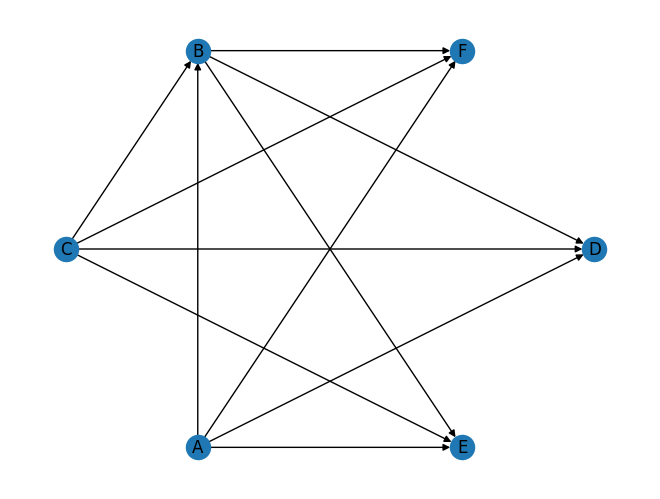

In [16]:
nxG = dcr_to_networkx(G)
nx.draw_circular(nxG, with_labels=True)
for n in nxG.nodes:
    print(n)
    print([s for s in nxG.successors(n)])
    print([p for p in nxG.predecessors(n)])
nx.clustering(nxG)

In [3]:
def encode(G):
    enc = {}
    for e in G['events']:
        enc[e] = set()
    for e in G['events']:
        for e_prime in G['events']:
            for rel in Relations:
                if e in G[rel.value] and e_prime in G[rel.value][e]:
                    if rel in [Relations.C,Relations.M]:
                        enc[e].add((e_prime,rel.value,'in'))
                    else:
                        enc[e].add((e_prime,rel.value,'out'))
                if e_prime in G[rel.value] and e in G[rel.value][e_prime]:
                    if rel in [Relations.C,Relations.M]:
                        enc[e].add((e_prime,rel.value,'out'))
                    else:
                        enc[e].add((e_prime,rel.value,'in'))
    return enc

def getOppositeRelDictStr(relStr, direction, event, nestingId):
    relationDictStrDel = (event,relStr,"out" if direction == "in" else "in")
    relationDictStrAdd = (nestingId,relStr,"out"  if direction == "in" else "in")

    return relationDictStrDel, relationDictStrAdd


def nest(G):
    nesting_map = {}
    nesting_ids = set()

    nest_id = 0

    enc = encode(G)
    events = G['events'].copy()

    # Should probably copy enc and events here as these are mutated

    def getLargestNesting(events, nesting_map, nesting_ids, nest_id, parentNesting=None):
      cands = {}
      for e in events:
          for j in events:
              arrow_s = frozenset(enc[e].intersection(enc[j]))
              if len(arrow_s)>0:
                  cands[arrow_s] = set([e, j])
      for arrow_s in cands.keys():
          for e in events:
              if len(arrow_s)>0 and arrow_s.issubset(enc[e]):
                  cands[arrow_s].add(e)

      best_score = 0
      best = None
      for arrow_s in cands.keys():
          cand_score = (len(cands[arrow_s])-1)*len(arrow_s)
          if cand_score>best_score:
              best_score = cand_score
              best = arrow_s

      if best_score == 0:
          return set(), nest_id

      print(f'[best] {cands[best]} {best} '
            f'\n [enc] \n {enc} \n '
            f'\n [cands] \n {cands} \n')

      nest_id += 1
      print("[nest id]", nest_id)
      nest_event = f'N{nest_id}'
      nesting_ids.add(nest_event)

      if (parentNesting != None):
        (parentId, nestingEvents) = parentNesting
        nestingEvents = nestingEvents.difference(cands[best]) # vco: this needs a return variable
        nestingEvents.add(nest_event)
        nesting_map[nest_event] = parentId

      enc[nest_event] = set(best)
      for e in cands[best]:
          nesting_map[e] = nest_event
          enc[e] = enc[e].difference(best)
          for (e_prime,rel,direction) in best:
              opRelDel, opRelAdd = getOppositeRelDictStr(rel,direction,e,nest_event)
              enc[e_prime].discard(opRelDel)
              enc[e_prime].add(opRelAdd)

      while True:
        foundNesting, nest_id = getLargestNesting(cands[best], nesting_map, nesting_ids, nest_id, parentNesting=(nest_event, cands[best]))
        if (len(foundNesting) == 0):
          break
        # vco: don't you have to remove foundNesting from events also here?

      # print(f'[nesting_map] {nesting_map}')
      # print(f'[nesting_map_prime] {nesting_map_prime}')

      return cands[best], nest_id

    while True:
        # add a second while loop that recursively calls nest()
        foundNesting, nest_id = getLargestNesting(events, nesting_map, nesting_ids, nest_id,)
        if (len(foundNesting) == 0):
          break
        events = events.difference(foundNesting)
        print(f'[events] {events}')

    return enc, nesting_ids, nesting_map

In [13]:
import pm4py
from copy import deepcopy
from pm4py.objects.dcr.obj import Relations, dcr_template
from pm4py.algo.discovery.dcr_discover import algorithm as dcr_alg

sepsis_log = pm4py.read_xes('/home/vco/Datasets/Sepsis Cases - Event Log.xes',return_legacy_log_object=True)
sepsis, _ = dcr_alg.apply(sepsis_log)
enc, nesting_ids, nesting_map = nest(sepsis)
print(nesting_ids)
print(sorted([(k,v) for k, v in nesting_map.items()]))
# print(enc)

parsing log, completed traces ::   0%|          | 0/1050 [00:00<?, ?it/s]

[i] Mining with basic DisCoveR
[best] {'Release C', 'Release E', 'Release D', 'Release B'} frozenset({('Release B', 'excludesTo', 'out'), ('Release D', 'excludesTo', 'out'), ('Release E', 'excludesTo', 'in'), ('Release A', 'excludesTo', 'out'), ('Release C', 'excludesTo', 'out'), ('LacticAcid', 'excludesTo', 'out'), ('Release B', 'excludesTo', 'in'), ('Release D', 'excludesTo', 'in'), ('Release A', 'excludesTo', 'in'), ('Release C', 'excludesTo', 'in'), ('ER Sepsis Triage', 'conditionsFor', 'in'), ('Leucocytes', 'excludesTo', 'out'), ('Leucocytes', 'conditionsFor', 'in'), ('ER Triage', 'excludesTo', 'out'), ('CRP', 'excludesTo', 'out'), ('Release E', 'excludesTo', 'out'), ('CRP', 'conditionsFor', 'in'), ('Admission IC', 'excludesTo', 'out')}) 
 [enc] 
 {'IV Antibiotics': {('IV Antibiotics', 'excludesTo', 'out'), ('ER Sepsis Triage', 'conditionsFor', 'in'), ('IV Antibiotics', 'excludesTo', 'in')}, 'ER Registration': {('Admission IC', 'conditionsFor', 'out'), ('Admission NC', 'conditions

In [15]:
def should_add(rel, direction):
    return direction == 'in' if rel in [Relations.C.value, Relations.M.value] else direction == 'out'

def get_nested_dcr_graph(enc, nesting_ids, nesting_map, existing_nestings=None):
    res_dcr = deepcopy(dcr_template)
    events = set(enc.keys())
    res_dcr['events'] = events
    res_dcr['marking']['included'] = events

    for n in nesting_ids:
        res_dcr['nestings'][n] = set()
    for k, v in nesting_map.items():
        res_dcr['nestings'][v].add(k)

    for e, v in enc.items():
        for e_prime, rel, direction in v:
            if should_add(rel, direction):
                if e not in res_dcr[rel]:
                    res_dcr[rel][e] = set()
                res_dcr[rel][e].add(e_prime)

    if existing_nestings:
        for me, me_events in existing_nestings.items():
            if me not in res_dcr['nestings']:
                res_dcr['nestings'][me] = set()
            for me_event in me_events:
                if me_event in nesting_map:
                    highest_nesting = nesting_map[me_event]
                    while True:
                        if highest_nesting in nesting_map:
                            highest_nesting = nesting_map[highest_nesting]
                        else:
                            break
                    if highest_nesting not in res_dcr['nestings'][me]:
                        res_dcr['nestings'][me].add(highest_nesting)
                else:
                    res_dcr['nestings'][me].add(me_event)

    res_dcr['nestingsMap'] = deepcopy(nesting_map)
    return res_dcr

dcr_from_axel = get_nested_dcr_graph(enc,nesting_ids,nesting_map)
dcr_from_axel

{'events': {'Admission IC',
  'Admission NC',
  'CRP',
  'ER Registration',
  'ER Sepsis Triage',
  'ER Triage',
  'IV Antibiotics',
  'IV Liquid',
  'LacticAcid',
  'Leucocytes',
  'N1',
  'N2',
  'N3',
  'N4',
  'N5',
  'N6',
  'N7',
  'Release A',
  'Release B',
  'Release C',
  'Release D',
  'Release E',
  'Return ER'},
 'conditionsFor': {'IV Antibiotics': {'ER Sepsis Triage'},
  'Return ER': {'N2', 'N4'},
  'Release B': {'ER Registration', 'ER Triage'},
  'N1': {'ER Sepsis Triage', 'N7'},
  'N2': {'Admission NC'},
  'N3': {'ER Registration', 'ER Triage'}},
 'milestonesFor': {},
 'responseTo': {},
 'noResponseTo': {},
 'includesTo': {},
 'excludesTo': {'IV Antibiotics': {'IV Antibiotics'},
  'ER Registration': {'ER Registration'},
  'Release A': {'N1', 'N3'},
  'Return ER': {'ER Triage', 'N5', 'Release B', 'Return ER'},
  'ER Sepsis Triage': {'ER Sepsis Triage'},
  'Release B': {'N1', 'Return ER'},
  'IV Liquid': {'IV Liquid'},
  'N1': {'N2', 'N4', 'N6', 'Release B'},
  'N2': {'Ad

In [16]:
from pm4py.algo.discovery.dcr_discover import algorithm as dcr_alg
from pm4py.algo.discovery.dcr_discover.algorithm import Variants
from pm4py.objects.dcr.exporter import exporter

res_dcr, _ = dcr_alg.apply(sepsis_log,Variants.DCR_N)
print(set(res_dcr['nestings'].keys()))
print(sorted([(k,v) for k, v in res_dcr['nestingsMap'].items()]))

[i] Mining with N-DisCoveR
{'N6', 'N5', 'N1', 'N2', 'N7', 'N4', 'N3'}
[('Admission IC', 'N5'), ('Admission NC', 'N5'), ('CRP', 'N7'), ('ER Triage', 'N6'), ('LacticAcid', 'N6'), ('Leucocytes', 'N7'), ('N2', 'N1'), ('N4', 'N3'), ('N5', 'N4'), ('N7', 'N6'), ('Release A', 'N4'), ('Release B', 'N1'), ('Release C', 'N2'), ('Release D', 'N2'), ('Release E', 'N2')]


In [17]:
exporter.apply(dcr_from_axel,'/home/vco/Projects/pm4py-dcr/models/pula.xml')

In [9]:
sorted([(k,v) for k, v in res_dcr['nestingsMap'].items()]) == sorted([(k,v) for k, v in nesting_map.items()])

False